In [5]:
from matplotlib import pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import os
import json
import pandas as pd
import sys
sys.path.append("D:\\Research_CAE\\MyTinyCUDANN\\tiny-cuda-nn\\main")
from tools import get_lambda_curve,get_loss_curve,get_result_table
main_path = os.path.dirname(os.path.abspath("__file__"))
print(main_path)
figure_path = os.path.join(main_path, "figs")
fontsize = 18
plt.rcParams['font.size'] = fontsize
plt.rcParams['figure.dpi'] = 100
plt.rcParams['lines.linewidth'] = 2

result_dict = {}

d:\Research_CAE\MyTinyCUDANN\tiny-cuda-nn\main\Phase_field_1d


In [7]:
def get_loss_curve(task_name,dir_name):
    task_path = os.path.join(main_path, "Tasks",task_name)

    result_path = os.path.join(task_path, dir_name)
    with open(result_path + ".json", "r") as config_file:
        config = json.load(config_file)
        print(config)
    time = []
    error = []
    for result_file in os.listdir(result_path):
        if not result_file.endswith(".txt"):
            continue
        loss_curve = np.loadtxt(os.path.join(result_path, result_file))
        time.append(loss_curve[:,0])
        error.append(loss_curve[:,-1])

    time = np.array(time).mean(axis=0)
    error = np.array(error)
    x = time
    y = np.mean(error,axis=0)
    y1 = np.min(error,axis=0)
    y2 = np.max(error,axis=0)
    res_dict = {"x":x,"y":y,"y1":y1,"y2":y2}
    return res_dict

def get_lambda_curve(task_name):
    task_path = os.path.join(main_path, "Tasks",task_name)
    lambda_list = []
    error_list = []
    for dir_name in os.listdir(task_path):
        if dir_name.endswith(".json"):
            continue
        result_path = os.path.join(task_path, dir_name)
        with open(result_path + ".json", "r") as config_file:
            config = json.load(config_file)
            lambda_list.append(config["loss"]["lambda"])
        time = []
        error = []
        for result_file in os.listdir(result_path):
            if not result_file.endswith(".txt"):
                continue
            loss_curve = np.loadtxt(os.path.join(result_path, result_file))
            error.append(loss_curve[-1,-1])
        error_list.append([np.mean(error),np.min(error),np.max(error)])

    lambda_list = np.array(lambda_list)
    error_list = np.array(error_list)[np.argsort(lambda_list)]
    lambda_list = lambda_list[np.argsort(lambda_list)]

    x = lambda_list
    y = error_list[:,0]
    y1 = error_list[:,1]
    y2 = error_list[:,2]
    res_dict = {"x": x,"y": y,"y1": y1,"y2": y2}
    return res_dict
    

Lambda vs finial error

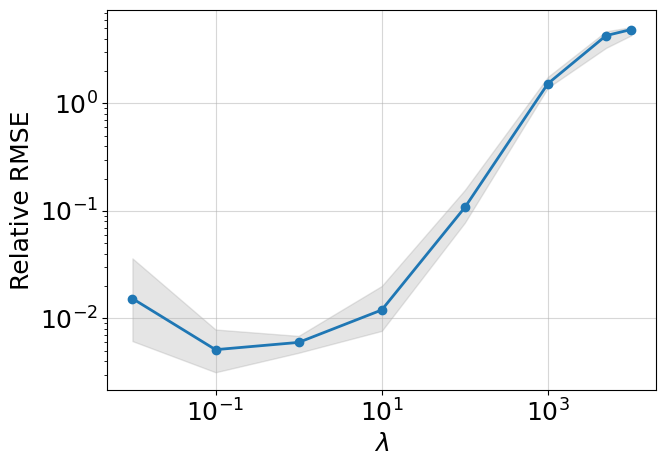

In [7]:
task_name = "PINN_lambda_ADAM"
# task_name = "GridMLP_standard"
# task_name = "PINN_energy_lambda_ADAM"
task_path = os.path.join(main_path, "Tasks",task_name)



lambda_list = []
error_list = []
for dir_name in os.listdir(task_path):
    if dir_name.endswith(".json"):
        continue
    result_path = os.path.join(task_path, dir_name)
    with open(result_path + ".json", "r") as config_file:
        config = json.load(config_file)
        lambda_list.append(config["loss"]["lambda"])
    time = []
    error = []
    for result_file in os.listdir(result_path):
        if not result_file.endswith(".txt"):
            continue
        loss_curve = np.loadtxt(os.path.join(result_path, result_file))
        # time.append(loss_curve[:,0])
        error.append(loss_curve[-1,-1])
    error_list.append([np.mean(error),np.min(error),np.max(error)])


lambda_list = np.array(lambda_list)
error_list = np.array(error_list)[np.argsort(lambda_list)]
lambda_list = lambda_list[np.argsort(lambda_list)]


fig = plt.figure(figsize=(7,5))
x = lambda_list
y = error_list[:,0]
y1 = error_list[:,1]
y2 = error_list[:,2]
result_dict[task_name] = {"x": x,"y": y,"y1": y1,"y2": y2}
plt.plot(x, y,marker="o")
plt.fill_between(x, y1, y2, 
                 color='gray', alpha=0.2)
plt.xlabel(r"$\lambda$")
plt.ylabel("Relative RMSE")
plt.yscale("log")
plt.xscale("log")
plt.grid(alpha = 0.5)
fig.tight_layout()
plt.show()

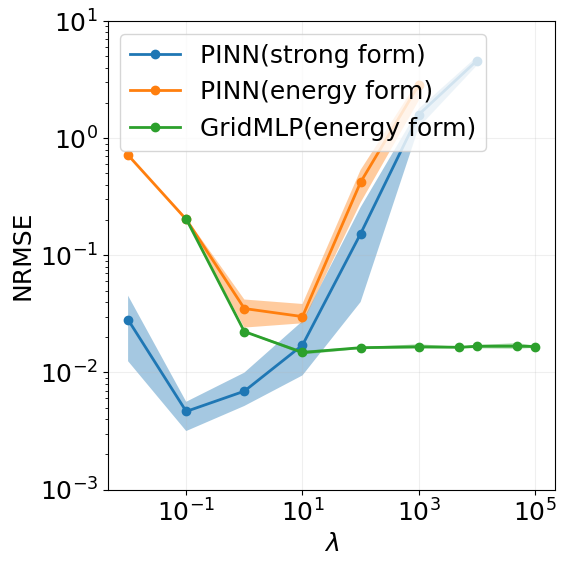

In [13]:
loss_name_list = [
    "PINN_lambda_ADAM",
    "PINN_energy_lambda_ADAM",
    "GridMLP_standard",
]
label_list = [
    
    "PINN(strong form)",
    "PINN(energy form)",
    "GridMLP(energy form)",
]

for loss_name in loss_name_list:
    loss_dict = get_lambda_curve(loss_name)
    result_dict[loss_name] = loss_dict

fig = plt.figure(figsize=(6,6))
i = 0

for loss_name in loss_name_list:
    plt.plot(result_dict[loss_name]["x"],result_dict[loss_name]["y"] ,marker="o",label=label_list[i])
    plt.fill_between(result_dict[loss_name]["x"], result_dict[loss_name]["y1"], result_dict[loss_name]["y2"], alpha=0.4)
    i += 1
plt.xlabel(r"$\lambda$")
# plt.ylabel("Relative RMSE")
plt.ylabel("NRMSE")

plt.yscale("log")
plt.yticks([1e-3,1e-2,1e-1,1e0,1e1])

# Set minor y-ticks
ax = plt.gca()  # Get current axis
ax.yaxis.set_minor_locator(ticker.LogLocator(base=10.0, subs='auto', numticks=12))


plt.xscale("log")
plt.grid(alpha = 0.2)
plt.legend(loc = "upper left")
fig.tight_layout()
plt.savefig(os.path.join(figure_path,"lambda_error.png"), dpi=300)
plt.show()

Loss curve 

{'encoding': {'otype': 'Grid', 'type': 'Dense', 'n_levels': 16, 'n_features_per_level': 2, 'log2_hashmap_size': 15, 'base_resolution': 16, 'per_level_scale': 1.12, 'interpolation': 'Linear'}, 'network': {'type': 'MLP', 'activation': 'Tanh', 'n_neurons': 32, 'n_hidden_layers': 1, 'spectral_norm': 1}, 'loss': {'type': 'energy', 'lambda': 1.0}, 'optimizer': {'type': 'ADAM', 'learning_rate': 0.005, 'max_iter': 0, 'n_step_decay': 500, 'gamma': 0.4}, 'training': {'n_steps': 6000, 'interior_batch': 30000, 'boundary_batch': 2000, 'n_step_output': 600}, 'pretrain': {'n_steps': 500, 'n_step_output': 100, 'n_step_decay': 100}, 'experiment': {'n_test': 10}}


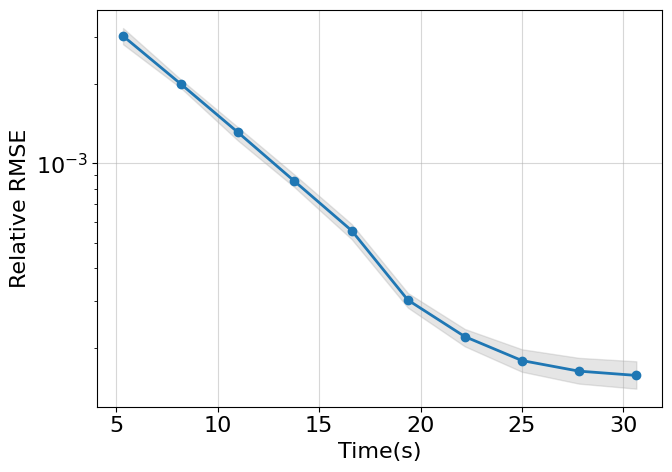

In [82]:
task_name = "GridMLP_decoupled"

dir_name = "config_1"

loss_dict = get_loss_curve(task_name,dir_name)


fig = plt.figure(figsize=(7,5))
result_dict["{}/{}".format(task_name,dir_name)] = loss_dict
plt.plot(loss_dict["x"],loss_dict["y"] ,marker="o")
plt.fill_between(loss_dict["x"], loss_dict["y1"], loss_dict["y2"],color='gray', alpha=0.2)
plt.xlabel("Time(s)")
plt.ylabel("Relative RMSE")
plt.yscale("log")
# plt.xscale("log")
plt.grid(alpha = 0.5)
fig.tight_layout()
plt.show()

{'encoding': {'otype': 'Grid', 'type': 'Dense', 'n_levels': 16, 'n_features_per_level': 2, 'log2_hashmap_size': 15, 'base_resolution': 16, 'per_level_scale': 1.12, 'interpolation': 'Linear'}, 'network': {'type': 'MLP', 'activation': 'Tanh', 'n_neurons': 32, 'n_hidden_layers': 1, 'spectral_norm': 1}, 'loss': {'type': 'energy', 'lambda': 100000}, 'optimizer': {'type': 'ADAM', 'learning_rate': 0.005, 'max_iter': 0, 'n_step_decay': 500, 'gamma': 0.4}, 'training': {'n_steps': 6000, 'interior_batch': 30000, 'boundary_batch': 2000, 'n_step_output': 600}, 'pretrain': {'n_steps': 500, 'n_step_output': 100, 'n_step_decay': 100}, 'experiment': {'n_test': 10}}


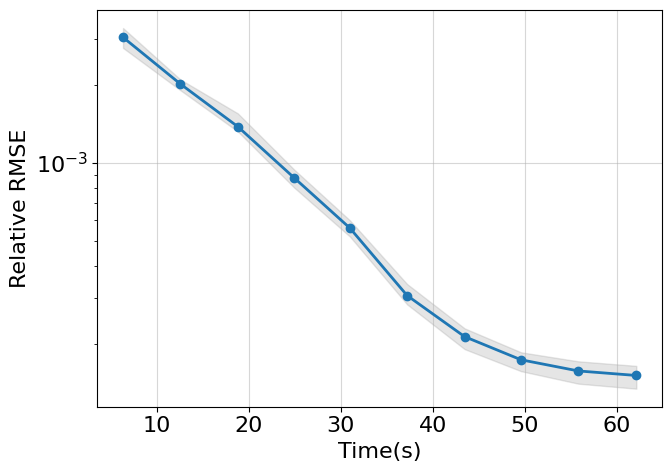

In [83]:
task_name = "GridMLP_standard"#"PINN_lambda_ADAM"

dir_name = "config_8"

loss_dict = get_loss_curve(task_name,dir_name)


fig = plt.figure(figsize=(7,5))
result_dict["{}/{}".format(task_name,dir_name)] = loss_dict
plt.plot(loss_dict["x"],loss_dict["y"] ,marker="o")
plt.fill_between(loss_dict["x"], loss_dict["y1"], loss_dict["y2"],color='gray', alpha=0.2)
plt.xlabel("Time(s)")
plt.ylabel("Relative RMSE")
plt.yscale("log")
# plt.xscale("log")
plt.grid(alpha = 0.5)
fig.tight_layout()
plt.show()

In [ ]:
task_name = "PINN_energy_lambda_ADAM"

dir_name = "config_1"

loss_dict = get_loss_curve(task_name,dir_name)


fig = plt.figure(figsize=(7,5))
result_dict["{}/{}".format(task_name,dir_name)] = loss_dict
plt.plot(loss_dict["x"],loss_dict["y"] ,marker="o")
plt.fill_between(loss_dict["x"], loss_dict["y1"], loss_dict["y2"],color='gray', alpha=0.2)
plt.xlabel("Time(s)")
plt.ylabel("Relative RMSE")
plt.yscale("log")
# plt.xscale("log")
plt.grid(alpha = 0.5)
fig.tight_layout()
plt.show()

{'encoding': {'type': 'Dense', 'n_levels': 16, 'n_features_per_level': 2, 'log2_hashmap_size': 15, 'base_resolution': 16, 'per_level_scale': 1.12, 'interpolation': 'Linear'}, 'network': {'type': 'MLP', 'activation': 'Tanh', 'n_neurons': 64, 'n_hidden_layers': 5}, 'loss': {'type': 'strong', 'lambda': 1000}, 'optimizer': {'type': 'ADAM', 'learning_rate': 0.005, 'max_iter': 0, 'n_step_decay': 800, 'gamma': 0.4}, 'training': {'n_steps': 6000, 'interior_batch': 30000, 'boundary_batch': 2000, 'n_step_output': 600}, 'experiment': {'n_test': 10}}


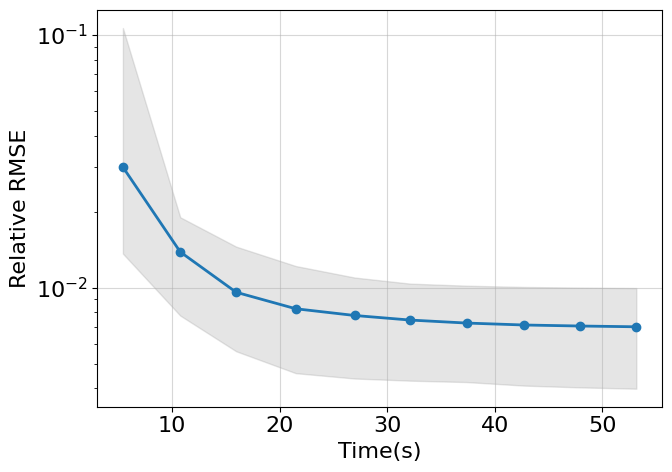

In [84]:
task_name = "PINN_energy_lambda_ADAM"

dir_name = "config_1"

loss_dict = get_loss_curve(task_name,dir_name)


fig = plt.figure(figsize=(7,5))
result_dict["{}/{}".format(task_name,dir_name)] = loss_dict
plt.plot(loss_dict["x"],loss_dict["y"] ,marker="o")
plt.fill_between(loss_dict["x"], loss_dict["y1"], loss_dict["y2"],color='gray', alpha=0.2)
plt.xlabel("Time(s)")
plt.ylabel("Relative RMSE")
plt.yscale("log")
# plt.xscale("log")
plt.grid(alpha = 0.5)
fig.tight_layout()
plt.show()

{'encoding': {'type': 'Dense', 'n_levels': 16, 'n_features_per_level': 2, 'log2_hashmap_size': 15, 'base_resolution': 16, 'per_level_scale': 1.12, 'interpolation': 'Linear'}, 'network': {'type': 'MLP', 'activation': 'Tanh', 'n_neurons': 64, 'n_hidden_layers': 5}, 'loss': {'type': 'strong', 'lambda': 1}, 'optimizer': {'type': 'ADAM', 'learning_rate': 0.005, 'max_iter': 0, 'n_step_decay': 800, 'gamma': 0.4}, 'training': {'n_steps': 6000, 'interior_batch': 30000, 'boundary_batch': 2000, 'n_step_output': 600}, 'experiment': {'n_test': 5}}
{'encoding': {'type': 'Dense', 'n_levels': 16, 'n_features_per_level': 2, 'log2_hashmap_size': 15, 'base_resolution': 16, 'per_level_scale': 1.12, 'interpolation': 'Linear'}, 'network': {'type': 'MLP', 'activation': 'Tanh', 'n_neurons': 64, 'n_hidden_layers': 5}, 'loss': {'type': 'strong', 'lambda': 10}, 'optimizer': {'type': 'ADAM', 'learning_rate': 0.005, 'max_iter': 0, 'n_step_decay': 800, 'gamma': 0.4}, 'training': {'n_steps': 6000, 'interior_batch': 

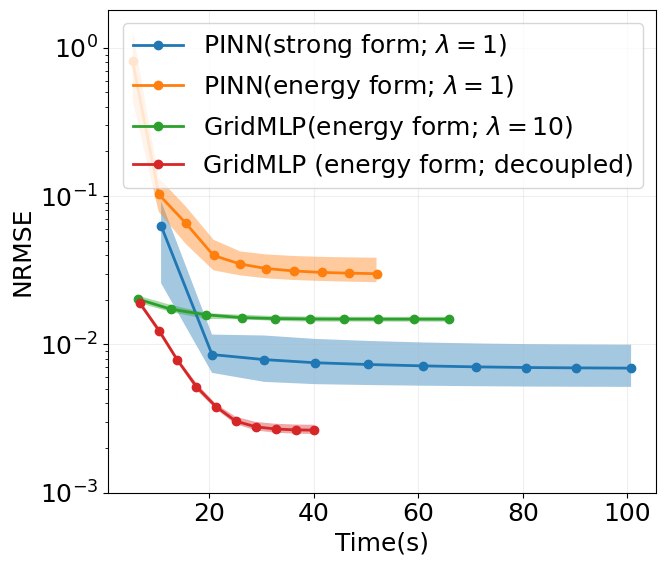

In [24]:
loss_name_list = [
"PINN_lambda_ADAM/config_2",
"PINN_energy_lambda_ADAM/config_3",
"GridMLP_standard/config_2",
"GridMLP_decoupled/config_1",
# "GridMLP_decoupled_1feature/config_1",
]

label_list = [

r"PINN(strong form; $\lambda = 1$)",
r"PINN(energy form; $\lambda = 1$)",
r"GridMLP(energy form; $\lambda = 10$)",
"GridMLP (energy form; decoupled)",
]

for loss_name in loss_name_list:
    task_name,dir_name = loss_name.split("/")
    loss_dict = get_loss_curve(task_name,dir_name)
    result_dict[loss_name] = loss_dict

fig = plt.figure(figsize=(7,6))
i = 0
for loss_name in loss_name_list:
    plt.plot(result_dict[loss_name]["x"],result_dict[loss_name]["y"] ,marker="o",label=label_list[i])
    plt.fill_between(result_dict[loss_name]["x"], result_dict[loss_name]["y1"], result_dict[loss_name]["y2"], alpha=0.4)
    i += 1
plt.xlabel("Time(s)")
# plt.ylabel("Relative RMSE")
plt.ylabel("NRMSE")
plt.yscale("log")
plt.yticks([1e-3,1e-2,1e-1,1e0])

# Set minor y-ticks
ax = plt.gca()  # Get current axis
ax.yaxis.set_minor_locator(ticker.LogLocator(base=10.0, subs='auto', numticks=12))
# plt.xscale("log")
plt.grid(alpha = 0.2)
plt.legend()
fig.tight_layout()
plt.savefig(os.path.join(figure_path,"training_loss.png"), dpi=300)
plt.show()

In [20]:
all_df = pd.DataFrame()
task_list = [
"GridMLP_decoupled_resolution_levels_network_sin",
]
param_list = [
    ["network","n_neurons"],
    ["network","n_hidden_layers"],
    ["encoding","base_resolution"],
    ["encoding","n_levels"],]
for task_name in task_list:
    result_dict = get_result_table(task_name,param_list,main_path=main_path)
    result_df = pd.DataFrame(result_dict).T
    all_df = pd.concat([all_df,result_df])
# all_df = all_df[all_df["interior_batch"] == 3e4]

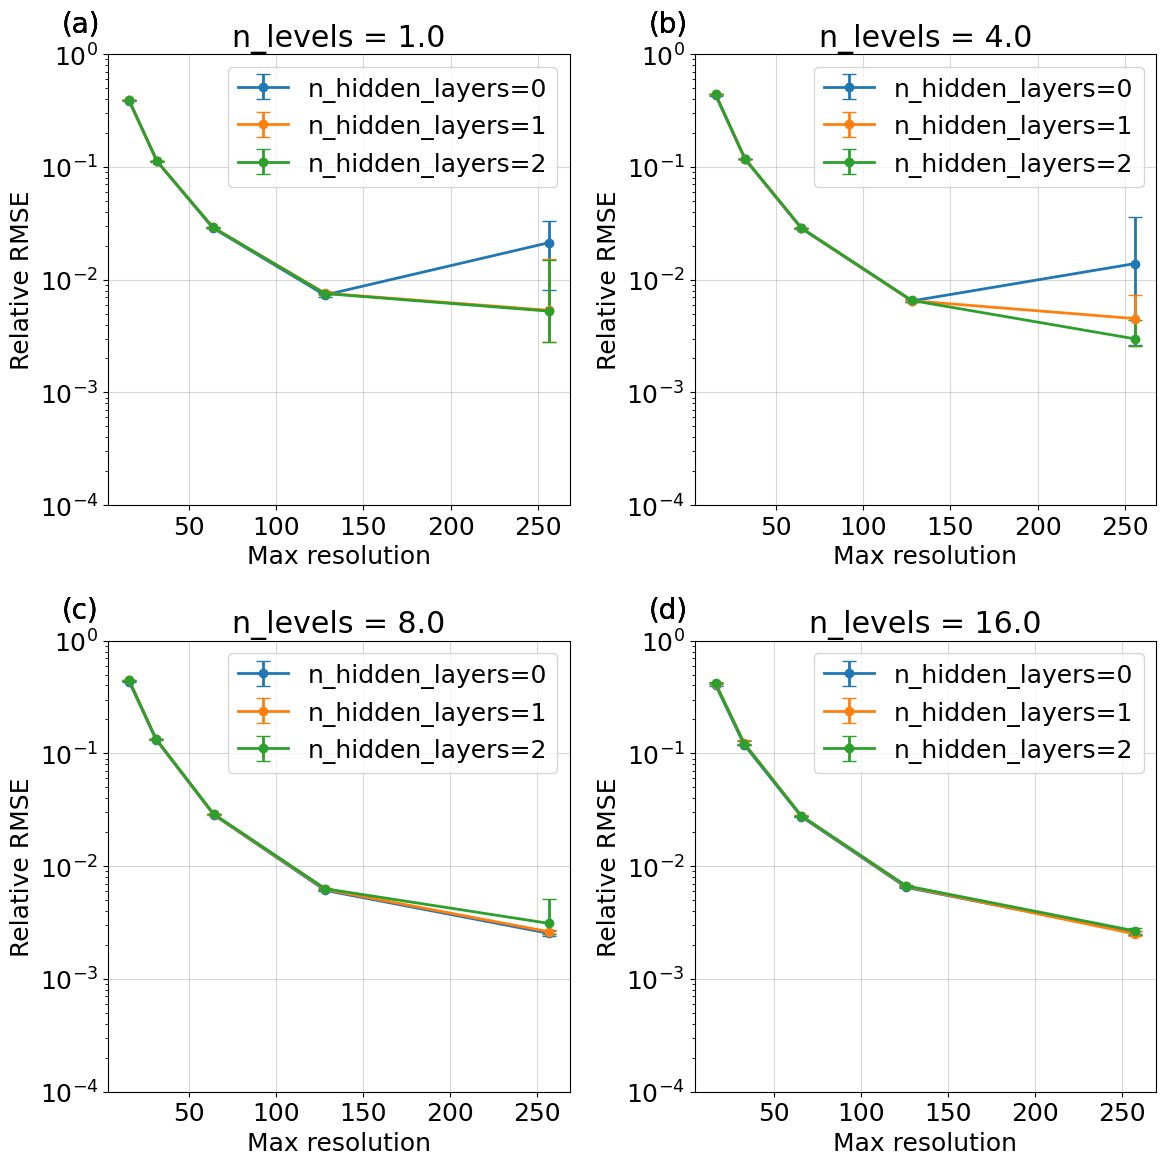

In [25]:
label_name = "n_hidden_layers" # "n_neurons" #
filter_name = "n_neurons" #"n_hidden_layers" # 
filter_value = 64
label_list = np.sort(all_df[label_name].unique())
result_df = all_df[all_df[filter_name] == filter_value]


i=0
plt.figure(figsize=(12,12))

for n_levels in np.sort(all_df["n_levels"].unique()):
    i = i + 1
    result_df_plots = result_df[result_df["n_levels"] == n_levels]
    plt.subplot(2,2,i)
    for label in label_list:
        sub_df = result_df_plots[result_df_plots[label_name] == label]
        sort_idx = np.argsort(sub_df["base_resolution"])
        base_resolution = sub_df["base_resolution"][sort_idx]
        x_plot = base_resolution*1.12**(n_levels-1)
        y_plot = sub_df["error"][sort_idx]#[x_plot<500]
        y1_plot = sub_df["error_min"][sort_idx]#[x_plot<500]
        y2_plot = sub_df["error_max"][sort_idx]#[x_plot<500]
        
        x_plot = x_plot[x_plot<500]
        y_err_plot = np.vstack([y_plot-y1_plot,y2_plot-y_plot])
        plt.errorbar(x_plot,y_plot,yerr=y_err_plot,marker="o",capsize=5,label=label_name+"={}".format(int(label)))
        plt.legend()
        # plt.xticks(xticks,(xticks*1.12**(4-2)).astype(int))
        plt.yscale("log")
        plt.yticks([1e0,1e-1,1e-2,1e-3,1e-4])
        plt.ylabel("Relative RMSE")
        plt.xlabel("Max resolution")
        plt.text(-0.1, 1.1, "({})".format(chr(i+96)), transform=plt.gca().transAxes, va='top', fontsize=int(fontsize+2))

        plt.grid(alpha = 0.5)
        # plt.title("Simple MLP (0 hidden layer, 16 neurons)")
        plt.title("n_levels = {}".format(n_levels))
        plt.tight_layout()
plt.tight_layout()
plt.savefig(os.path.join(figure_path,"GridMLP_decoupled_resolution_levels_network_sin.png"), dpi=300)
plt.show()

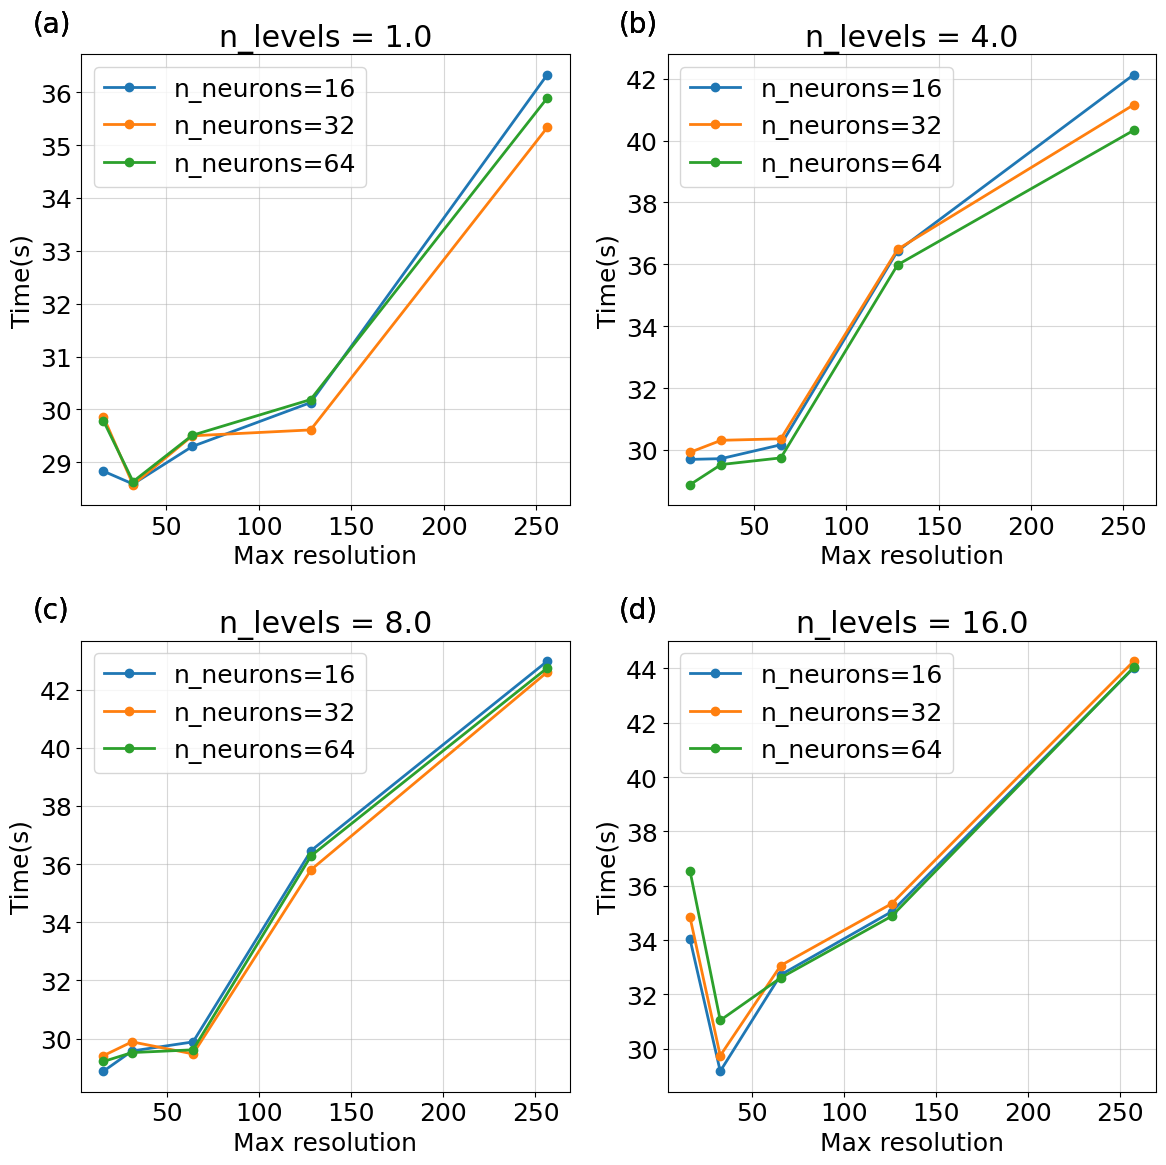

In [28]:
# n_level_list = np.sort(all_df["n_levels"].unique())
label_name = "n_neurons" #"n_hidden_layers" # 
filter_name = "n_hidden_layers" #"n_neurons" # 
filter_value = 2
label_list = np.sort(all_df[label_name].unique())
result_df = all_df[all_df[filter_name] == filter_value]


i=0
plt.figure(figsize=(12,12))

for n_levels in np.sort(all_df["n_levels"].unique()):
    i = i + 1
    result_df_plots = result_df[result_df["n_levels"] == n_levels]
    plt.subplot(2,2,i)
    for label in label_list:
        sub_df = result_df_plots[result_df_plots[label_name] == label]
        sort_idx = np.argsort(sub_df["base_resolution"])
        base_resolution = sub_df["base_resolution"][sort_idx]
        x_plot = base_resolution*1.12**(n_levels-1)
        y_plot = sub_df["time"][sort_idx][x_plot<500]
        # y1_plot = sub_df["error_min"][sort_idx][x_plot<500]
        # y2_plot = sub_df["error_max"][sort_idx][x_plot<500]
        
        x_plot = x_plot[x_plot<500]
        # y_err_plot = np.vstack([y_plot-y1_plot,y2_plot-y_plot])
        # plt.errorbar(x_plot,y_plot,yerr=y_err_plot,marker="o",capsize=5,label=label_name+"={}".format(int(label)))
        plt.plot(x_plot,y_plot,marker="o",label=label_name+"={}".format(int(label)))
        plt.legend()
        # plt.xticks(xticks,(xticks*1.12**(4-2)).astype(int))
        # plt.yscale("log")
        # plt.yticks([1e0,1e-1,1e-2,1e-3,1e-4])
        plt.ylabel("Time(s)")
        plt.xlabel("Max resolution")
        plt.text(-0.1, 1.1, "({})".format(chr(i+96)), transform=plt.gca().transAxes, va='top', fontsize=int(fontsize+2))

        plt.grid(alpha = 0.5)
        # plt.title("Simple MLP (0 hidden layer, 16 neurons)")
        plt.title("n_levels = {}".format(n_levels))
        plt.tight_layout()
plt.tight_layout()
# plt.savefig(os.path.join(figure_path,"GridMLP_decoupled_resolution_level_{}_{}={}.png".format(label_name,filter_name,filter_value)), dpi=300)